## Assignment 5
## Adam Curry

### Assignment 5.1

Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [25]:
import keras
import numpy as np
# Disable annoying depreciation warnings
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [26]:
# import the data set
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
print(train_labels[0])
print(train_data[0])

1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
max([max(sequence) for sequence in train_data])

9999

In [27]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [28]:
# test the decoded review
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [29]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [30]:
print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [32]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[0])
print(y_test[0])

1.0
0.0


In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5983 - acc: 0.7038 - val_loss: 0.4008 - val_acc: 0.8722
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3341 - acc: 0.9047 - val_loss: 0.3269 - val_acc: 0.8769
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2334 - acc: 0.9301 - val_loss: 0.3184 - val_acc: 0.8718
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1886 - acc: 0.9384 - val_loss: 0.2732 - val_acc: 0.8912
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1461 - acc: 0.9556 - val_loss: 0.2807 - val_acc: 0.8883
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1152 - acc: 0.9690 - val_loss: 0.2927 - val_acc: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1019 - acc: 0.9731 - val_loss: 0.3052 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0840 - a

In [41]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

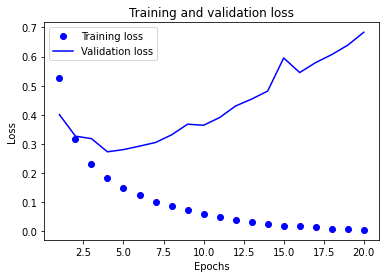

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

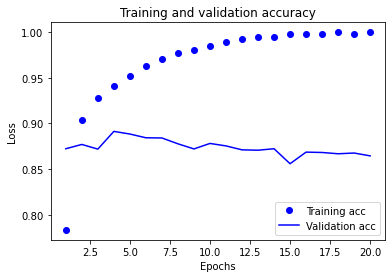

In [43]:

plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.5663 - accuracy: 0.7458
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2909 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2061 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2913 - accuracy: 0.8845


In [45]:
model.predict(x_test)


array([[0.20333898],
       [0.9999231 ],
       [0.96962285],
       ...,
       [0.15016863],
       [0.11006644],
       [0.73203605]], dtype=float32)

In [46]:
results
#88% accuracy

[0.29128310084342957, 0.8844799995422363]

### Assignment 5.2
Implement the news classifier found in section 3.5 of Deep Learning with Python.

In [2]:
import keras
#import reuters dataset
from keras.datasets import reuters
import numpy as np
# Disable annoying depreciation warnings
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
# length of sets
print(len(train_data))
print(len(test_data))
print(train_data[10])
print(train_labels[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


In [5]:
# decode a message

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)


557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
# vectorize with same code as prior assignment
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
# one hot encode the data to 1,0's
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
#test 
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 3.0547 - accuracy: 0.4363 - val_loss: 1.6895 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4893 - accuracy: 0.6956 - val_loss: 1.3185 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1044 - accuracy: 0.7706 - val_loss: 1.1677 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8646 - accuracy: 0.8192 - val_loss: 1.0427 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6779 - accuracy: 0.8569 - val_loss: 0.9900 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5472 - accuracy: 0.8845 - val_loss: 0.9547 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4307 - accuracy: 0.9092 - val_loss: 0.9648 - val_accuracy: 0.7940
Epoch 8/20
16

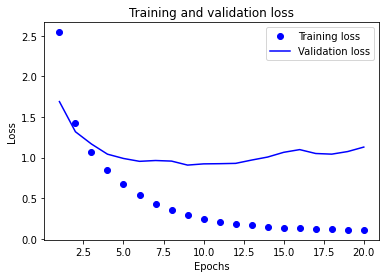

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# each epoch shows significantly less loss and better validation

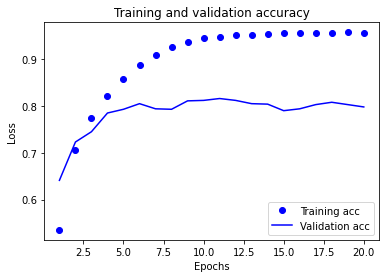

In [18]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 34ms/step - loss: 3.1320 - accuracy: 0.3808 - val_loss: 1.7475 - val_accuracy: 0.6390
Epoch 2/8
16/16 [==============================] - 0s 19ms/step - loss: 1.4986 - accuracy: 0.6926 - val_loss: 1.2881 - val_accuracy: 0.7200
Epoch 3/8
16/16 [==============================] - 0s 15ms/step - loss: 1.0785 - accuracy: 0.7676 - val_loss: 1.1337 - val_accuracy: 0.7500
Epoch 4/8
16/16 [==============================] - 0s 16ms/step - loss: 0.8337 - accuracy: 0.8204 - val_loss: 1.0129 - val_accuracy: 0.7760
Epoch 5/8
16/16 [==============================] - 0s 14ms/step - loss: 0.6674 - accuracy: 0.8611 - val_loss: 0.9384 - val_accuracy: 0.8120
Epoch 6/8
16/16 [==============================] - 0s 16ms/step - loss: 0.5200 - accuracy: 0.8898 - val_loss: 0.9125 - val_accuracy: 0.8070
Epoch 7/8
16/16 [==============================] - 0s 16ms/step - loss: 0.4204 - accuracy: 0.9126 - val_loss: 0.8867 - val_accuracy: 0.8040
Epoch 8/8
71/71 [===

In [20]:
results

[0.9973253011703491, 0.7733749151229858]

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18655387355298308

In [22]:
predictions = model.predict(x_test)

In [23]:
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
3


In [24]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.1503 - accuracy: 0.3291 - val_loss: 2.0150 - val_accuracy: 0.5020
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.9002 - accuracy: 0.5321 - val_loss: 1.6320 - val_accuracy: 0.5710
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4876 - accuracy: 0.6140 - val_loss: 1.4505 - val_accuracy: 0.6190
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2598 - accuracy: 0.6461 - val_loss: 1.3737 - val_accuracy: 0.6330
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1314 - accuracy: 0.6668 - val_loss: 1.2967 - val_accuracy: 0.6700
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0271 - accuracy: 0.7142 - val_loss: 1.2587 - val_accuracy: 0.6930
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9034 - accuracy: 0.7737 - val_loss: 1.2289 - val_accuracy: 0.7310
Epoch 8/20
63/63 [=

### Assignment 5.3

Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [1]:
import keras
import numpy as np
# Disable annoying depreciation warnings
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [3]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
#normalize with Z-scores
mean = train_data.mean(axis=0)

train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
import numpy as np
# k-folds validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [8]:
all_scores

[2.350787401199341, 2.7316765785217285, 2.778517961502075, 2.93033766746521]

In [9]:
np.mean(all_scores)

2.6978299021720886

In [10]:
from keras import backend as K

# Some memory clean-up - taken from https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb
K.clear_session()

In [11]:
#up the number of epochs
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
# history  of k-folds
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

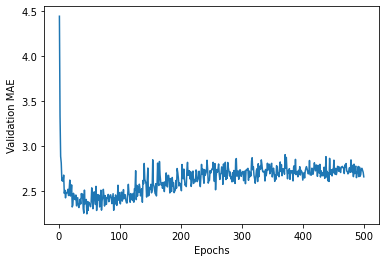

In [13]:
import matplotlib.pyplot as plt

#plot validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

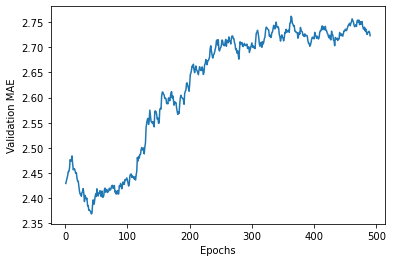

In [14]:
# plot scores sans first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [15]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          #optimum nbr of epochs
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 17.9833 - mae: 2.7306


In [16]:
test_mae_score

2.730595111846924